In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import jieba.posseg as psg
import seaborn as sns
plt.style.use('fivethirtyeight') 

#导入用于计数的包
from collections import Counter
import os
import requests

In [76]:
data = pd.read_csv('data_all.csv')

In [77]:
data.head()

,text,Release time
0,#????? ???????#\n\n前几天用农夫山泉的虎年纪念瓶插了花，据说这个瓶身设计是...,03月20日 10:50
1,#_啵崽の糕鸭##你还喝农夫山泉吗#卧槽，吓死了真的是，这个话题就不能说清楚吗？以为有什么事...,03月29日 10:46
2,#1067喇叭花快报# ?▲国家企业信用信息公示系统显示，浙江农夫山泉饮用水有限公司已注销。...,03月28日 23:43
3,#2023胡润百富榜发布#,2023/10/24 19:39
4,#2023胡润百富榜发布#【胡润百富榜：农夫山泉钟睒睒三度蝉联首富，马化腾重回第二，黄峥首次...,03月28日 19:58


In [78]:
#空值处理---excel上已处理
# 剔除纯数字评论，先将其转为空字符串，之后对空字符串统一处理。
#用空字符串('')替换纯数字('123')
data['text'] = data['text'].str.replace('^[0-9]*$', '')


C:\Users\admin\AppData\Local\Temp/ipykernel_18188/3678077356.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace('^[0-9]*$', '')


In [79]:
# 剔除单一重复字符的评论;用空字符串('')替换('111','aaa','....')等
data['text'] = data['text'].str.replace(r'^(.)\1*$', '')


C:\Users\admin\AppData\Local\Temp/ipykernel_18188/3439404758.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace(r'^(.)\1*$', '')


In [80]:
# 将评论中的时间转为空字符;用空字符串('')替换('2020/11/20 20:00:00')等
data['text'] = data['text'].str.replace(r'\d+/\d+/\d+ \d+:\d+:\d+', '')


C:\Users\admin\AppData\Local\Temp/ipykernel_18188/3327904572.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace(r'\d+/\d+/\d+ \d+:\d+:\d+', '')


In [81]:
#统计重复数字
data[['text']].duplicated().sum()

3739

In [82]:
data.head()

,text,Release time
0,#????? ???????#\n\n前几天用农夫山泉的虎年纪念瓶插了花，据说这个瓶身设计是...,03月20日 10:50
1,#_啵崽の糕鸭##你还喝农夫山泉吗#卧槽，吓死了真的是，这个话题就不能说清楚吗？以为有什么事...,03月29日 10:46
2,#1067喇叭花快报# ?▲国家企业信用信息公示系统显示，浙江农夫山泉饮用水有限公司已注销。...,03月28日 23:43
3,#2023胡润百富榜发布#,2023/10/24 19:39
4,#2023胡润百富榜发布#【胡润百富榜：农夫山泉钟睒睒三度蝉联首富，马化腾重回第二，黄峥首次...,03月28日 19:58


In [83]:
#评论去重
data = data.drop_duplicates(subset=['text'])

#会将标签重新从零开始顺序排序,使用参数设置drop=True删除旧的索引序列
data = data.reset_index(drop=True)
data = data[['text','Release time']]
data.head()

,text,Release time
0,#????? ???????#\n\n前几天用农夫山泉的虎年纪念瓶插了花，据说这个瓶身设计是...,03月20日 10:50
1,#_啵崽の糕鸭##你还喝农夫山泉吗#卧槽，吓死了真的是，这个话题就不能说清楚吗？以为有什么事...,03月29日 10:46
2,#1067喇叭花快报# ?▲国家企业信用信息公示系统显示，浙江农夫山泉饮用水有限公司已注销。...,03月28日 23:43
3,#2023胡润百富榜发布#,2023/10/24 19:39
4,#2023胡润百富榜发布#【胡润百富榜：农夫山泉钟睒睒三度蝉联首富，马化腾重回第二，黄峥首次...,03月28日 19:58


In [84]:
# 提取评论列
text = data['text']

# 删除##之间的文字
pattern = re.compile(r'#.*?#|【.*?】')

# 使用lambda函数对评论进行处理
text = text.astype(str).apply(lambda x: re.sub(pattern, '+', x) if '#' in x else x)

text.shape



(42431,)

In [85]:
# 更新数据
data['text'] = text
# 打印更新后的数据
print(data['text'])

0        +\n\n前几天用农夫山泉的虎年纪念瓶插了花，据说这个瓶身设计是只送不卖的，很有收藏价值。感...
1                       ++卧槽，吓死了真的是，这个话题就不能说清楚吗？以为有什么事了+ ?
2        + ?▲国家企业信用信息公示系统显示，浙江农夫山泉饮用水有限公司已注销。网站信息显示，该公司...
3                                                        +
4        ++近日，胡润百富榜发布，农夫山泉钟睒睒以4500亿第三次成为中国首富，腾讯马化腾继2020...
                               ...                        
42426                                            没有条码，不能零售
42427                                            防止你用外面的替换
42428                                     防串货，毫升数和正常零售会有不同
42429         看你住什么酒店，好点的酒店是怡宝和依云，我在扬州住的酒店都是依云，农夫就是用来冲马桶的。
42430                             酒店供应的农夫就是用来冲马桶的，从来不喝，恶心。
Name: text, Length: 42431, dtype: object


In [86]:
# 去掉一些无用的字符，自行定一个字符几何，并从文本中去掉
#去除字母数字表情和其它字符
import re
def clear_character(sentence):
    pattern1='[a-zA-Z0-9]'
    pattern2 = re.compile(u'[^\s1234567890:：' + '\u4e00-\u9fa5]+')
    pattern3='[’!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+'
    line1=re.sub(pattern1,'',sentence)   #去除英文字母和数字
    line2=re.sub(pattern2,'',line1)   #去除表情和其他字符
    line3=re.sub(pattern3,'',line2)   #去除去掉残留的冒号及其它符号
    new_sentence=''.join(line3.split()) #去除空白
    return new_sentence

In [87]:
data.head()

,text,Release time
0,+\n\n前几天用农夫山泉的虎年纪念瓶插了花，据说这个瓶身设计是只送不卖的，很有收藏价值。感...,03月20日 10:50
1,++卧槽，吓死了真的是，这个话题就不能说清楚吗？以为有什么事了+ ?,03月29日 10:46
2,+ ?▲国家企业信用信息公示系统显示，浙江农夫山泉饮用水有限公司已注销。网站信息显示，该公司...,03月28日 23:43
3,+,2023/10/24 19:39
4,++近日，胡润百富榜发布，农夫山泉钟睒睒以4500亿第三次成为中国首富，腾讯马化腾继2020...,03月28日 19:58


In [88]:
data['text'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
42426    False
42427    False
42428    False
42429    False
42430    False
Name: text, Length: 42431, dtype: bool

In [89]:
#在["评论"]这一列使用定义的"clear_character"函数
data['text']=data['text'].apply(clear_character)
data.head()

,text,Release time
0,前几天用农夫山泉的虎年纪念瓶插了花据说这个瓶身设计是只送不卖的很有收藏价值感觉现在的年货越来...,03月20日 10:50
1,卧槽吓死了真的是这个话题就不能说清楚吗以为有什么事了,03月29日 10:46
2,国家企业信用信息公示系统显示浙江农夫山泉饮用水有限公司已注销网站信息显示该公司法定代表人为钟...,03月28日 23:43
3,,2023/10/24 19:39
4,近日胡润百富榜发布农夫山泉钟睒睒以亿第三次成为中国首富腾讯马化腾继年之后重回第二拼多多黄峥以...,03月28日 19:58


In [90]:
data['text'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
42426    False
42427    False
42428    False
42429    False
42430    False
Name: text, Length: 42431, dtype: bool

In [91]:
# 导入中文分词包jieba, 并用jieba对原始文本做分词
import jieba
from tqdm import tqdm
jieba.load_userdict("dic.txt")
def text_cut(text):
    # TODO: 使用结巴完成对每一个comment的分词
#     seg = jieba.lcut(content)
    seg = list(jieba.cut(text.strip()))
    return seg
# 输出进度条
tqdm.pandas(desc='apply')
data['text_processed'] = data['text'].progress_apply(text_cut)
# 观察新的数据的格式
data.head()

apply: 100%|██████████| 42431/42431 [00:06<00:00, 6804.91it/s]


,text,Release time,text_processed
0,前几天用农夫山泉的虎年纪念瓶插了花据说这个瓶身设计是只送不卖的很有收藏价值感觉现在的年货越来...,03月20日 10:50,"[前, 几天, 用, 农夫山泉, 的, 虎年, 纪念, 瓶, 插, 了, 花, 据说, 这个..."
1,卧槽吓死了真的是这个话题就不能说清楚吗以为有什么事了,03月29日 10:46,"[卧槽, 吓死, 了, 真的, 是, 这个, 话题, 就, 不能, 说, 清楚, 吗, 以为..."
2,国家企业信用信息公示系统显示浙江农夫山泉饮用水有限公司已注销网站信息显示该公司法定代表人为钟...,03月28日 23:43,"[国家, 企业信用, 信息, 公示, 系统, 显示, 浙江, 农夫山泉, 饮用水, 有限公司..."
3,,2023/10/24 19:39,[]
4,近日胡润百富榜发布农夫山泉钟睒睒以亿第三次成为中国首富腾讯马化腾继年之后重回第二拼多多黄峥以...,03月28日 19:58,"[近日, 胡润, 百富榜, 发布, 农夫山泉, 钟睒睒, 以, 亿, 第三次, 成为, 中国..."


In [92]:
# 读取下载的停用词表，并保存在列表中
with open('C:\\Users\\admin\\Desktop\\nlpp\\STOP_words.txt',"r",encoding='utf-8') as f:
    stopWords = f.read().split("\n")  
    

In [93]:
# 去除停用词
def rm_stop_word(wordList):
    # your code, remove stop words
    # TODO
    #outstr = ''
    # 去停用词
    #for word in wordList:
       # if word not in stopWords:
           # if word != '\t':
                #outstr += word
                #outstr += " "
    #return outstr
    filtered_words = [word for word in wordList if word not in stopWords]
    return filtered_words
    #return " ".join(filtered_words)
#这行代码中.progress_apply()函数的作用等同于.apply()函数的作用，只是写成.progress_apply()函数才能被tqdm包监控从而输出进度条。
data['text_processed'] = data['text_processed'].progress_apply(rm_stop_word)
# 观察新的数据的格式
data.head()

apply: 100%|██████████| 42431/42431 [00:25<00:00, 1686.09it/s]


,text,Release time,text_processed
0,前几天用农夫山泉的虎年纪念瓶插了花据说这个瓶身设计是只送不卖的很有收藏价值感觉现在的年货越来...,03月20日 10:50,"[前, 几天, 农夫山泉, 虎年, 纪念, 瓶, 插, 花, 瓶身, 设计, 送, 卖, 收..."
1,卧槽吓死了真的是这个话题就不能说清楚吗以为有什么事了,03月29日 10:46,"[卧槽, 吓死, 真的, 话题, 说, 事]"
2,国家企业信用信息公示系统显示浙江农夫山泉饮用水有限公司已注销网站信息显示该公司法定代表人为钟...,03月28日 23:43,"[国家, 企业信用, 信息, 公示, 系统, 显示, 浙江, 农夫山泉, 饮用水, 有限公司..."
3,,2023/10/24 19:39,[]
4,近日胡润百富榜发布农夫山泉钟睒睒以亿第三次成为中国首富腾讯马化腾继年之后重回第二拼多多黄峥以...,03月28日 19:58,"[近日, 胡润, 百富榜, 发布, 农夫山泉, 钟睒睒, 亿, 第三次, 中国, 首富, 腾..."


In [94]:
# 去除低频词, 去掉词频小于10的单词，并把结果存放在data['comment_processed']里
from collections import Counter
list_set = []
for i in range(len(data)):
    for j in data.iloc[i]['text_processed']: 
        list_set.extend(j)
        
words_count = Counter(list_set)
 
min_threshold=10
my_dict = {k: v for k, v in words_count.items() if v < min_threshold}
filteredA = Counter(my_dict)
 
# 去除低频词
def rm_low_frequence_word(wordList):
    # your code, remove stop words
    # TODO
    outstr = ''
    for word in wordList:
        if word not in filteredA:
            if word != '\t':
                outstr += word
                outstr += " "
    #filtered_words = [word for word in wordList if word not in filteredA]
    return outstr
                      
#这行代码中.progress_apply()函数的作用等同于.apply()函数的作用，只是写成.progress_apply()函数才能被tqdm包监控从而输出进度条。
data['text_processed'] = data['text_processed'].progress_apply(rm_low_frequence_word)
data.head()

apply: 100%|██████████| 42431/42431 [00:00<00:00, 249017.76it/s]


,text,Release time,text_processed
0,前几天用农夫山泉的虎年纪念瓶插了花据说这个瓶身设计是只送不卖的很有收藏价值感觉现在的年货越来...,03月20日 10:50,前 几天 农夫山泉 虎年 纪念 瓶 插 花 瓶身 设计 送 卖 收藏 价值 感觉 年货 越来...
1,卧槽吓死了真的是这个话题就不能说清楚吗以为有什么事了,03月29日 10:46,卧槽 吓死 真的 话题 说 事
2,国家企业信用信息公示系统显示浙江农夫山泉饮用水有限公司已注销网站信息显示该公司法定代表人为钟...,03月28日 23:43,国家 企业信用 信息 公示 系统 显示 浙江 农夫山泉 饮用水 有限公司 注销 网站 信息 ...
3,,2023/10/24 19:39,
4,近日胡润百富榜发布农夫山泉钟睒睒以亿第三次成为中国首富腾讯马化腾继年之后重回第二拼多多黄峥以...,03月28日 19:58,近日 胡润 百富榜 发布 农夫山泉 钟睒睒 亿 第三次 中国 首富 腾讯 马化腾 继年 重回...


In [44]:
data['text'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
42426    False
42427    False
42428    False
42429    False
42430    False
Name: text, Length: 42431, dtype: bool

In [40]:
data['text_processed'].isnull().sum()

0

In [74]:
data = data.drop(data[data['text'] == ''].index)

In [75]:
data.head()

,text,Release time
0,前几天用农夫山泉的虎年纪念瓶插了花据说这个瓶身设计是只送不卖的很有收藏价值感觉现在的年货越来...,03月20日 10:50
1,卧槽吓死了真的是这个话题就不能说清楚吗以为有什么事了,03月29日 10:46
2,国家企业信用信息公示系统显示浙江农夫山泉饮用水有限公司已注销网站信息显示该公司法定代表人为钟...,03月28日 23:43
4,近日胡润百富榜发布农夫山泉钟睒睒以亿第三次成为中国首富腾讯马化腾继年之后重回第二拼多多黄峥以...,03月28日 19:58
5,月日胡润研究院发布的胡润百富榜显示岁的农夫山泉董事长钟睒睒以亿元连续第三次成为中国首富但较去...,03月28日 17:59


In [69]:
data['text_processed'].isnull().sum()

0

In [70]:
#将数据信息保存
#index参数设置为False表示不保存行索引,header设置为False表示不保存列索引
data.to_csv("C:\\Users\\admin\\Desktop\\nlpp\\Cleaned_data_all.csv",index=False,header=True,encoding="utf-8")


In [71]:
#查看保存好的数据
#路径是各自数据路径的存放地址  
data = pd.read_csv('C:\\Users\\admin\\Desktop\\nlpp\\Cleaned_data_all.csv')
#输出数据的一些相关信息
print(data.info())
#看数据形状 (行数, 列数)
print(data.shape)
# 列标签 <Index>
print(data.columns )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42431 entries, 0 to 42430
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            42310 non-null  object
 1   Release time    42382 non-null  object
 2   text_processed  41916 non-null  object
dtypes: object(3)
memory usage: 994.6+ KB
None
(42431, 3)
Index(['text', 'Release time', 'text_processed'], dtype='object')


In [72]:
#统计单词的个数来得到每个句子的长度
data['text_len'] = data['text_processed'].apply(lambda x: len(str(x).split(' ')))

print(data['text_len'].describe())

count    42431.000000
mean        11.197709
std         19.443911
min          1.000000
25%          4.000000
50%          6.000000
75%         11.000000
max        642.000000
Name: text_len, dtype: float64


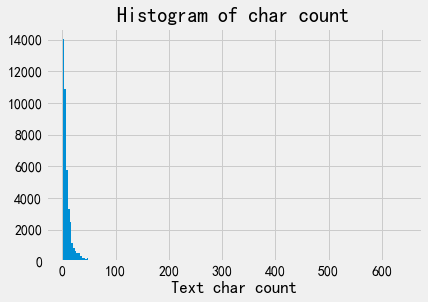

In [73]:
#生成长度统计图
_ = plt.hist(data['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")
#plt.savefig('./text_chart_count.png')
plt.show()

In [74]:
from snownlp import SnowNLP
data['text_processed'].isnull().sum() #一定要确保没有空值
data['text_processed'] = data['text_processed'].dropna()
data['text_processed']

0        前 几天 虎年 纪念 瓶 插 花 瓶身 设计 送 卖 收藏 价值 感觉 年货 越来越 设计 ...
1                                         卧槽 吓死 真的 话题 说 事 
2        国家 企业信用 信息 公示 系统 显示 浙江 饮用水 有限公司 注销 网站 信息 显示 公司...
3                                                      NaN
4        近日 胡润 百富榜 发布 亿 第三次 首富 腾讯 马化腾 继年 重回 拼 黄峥 亿 首次 位...
                               ...                        
42426                                               条码 零售 
42427                                               外面 替换 
42428                                        防串 货 毫升 数 零售 
42429                   住 酒店 好点 酒店 怡宝 依云 扬州 住 酒店 依云 农夫 马桶 
42430                                酒店 供应 农夫 马桶 从来不 喝 恶心 
Name: text_processed, Length: 42431, dtype: object

In [75]:
from snownlp import SnowNLP

def get_sentiment(x):
    if isinstance(x, str):  # 检查x是否为字符串类型
        try:
            return SnowNLP(x).sentiments
        except:
            return 
    else:
        return None  # 或者根据你的需求返回其他值

data['emotion'] = data['text_processed'].apply(get_sentiment)


In [76]:
data.describe()

,text_len,emotion
count,42431.000000,41916.000000
mean,11.197709,0.533924
std,19.443911,0.349569
min,1.000000,0.000000
25%,4.000000,0.205499
50%,6.000000,0.536580
75%,11.000000,0.889443
max,642.000000,1.000000


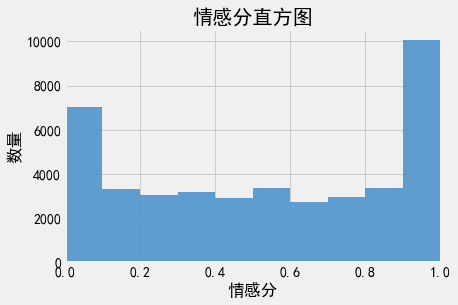

In [77]:
#情感分直方图
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

bins=np.arange(0,1.1,0.1)
plt.hist(data['emotion'],bins,color='#4F94CD',alpha=0.9)
plt.xlim(0,1)
plt.xlabel('情感分')
plt.ylabel('数量')
plt.title('情感分直方图')

plt.show()


In [78]:
data['text_processed']

0        前 几天 虎年 纪念 瓶 插 花 瓶身 设计 送 卖 收藏 价值 感觉 年货 越来越 设计 ...
1                                         卧槽 吓死 真的 话题 说 事 
2        国家 企业信用 信息 公示 系统 显示 浙江 饮用水 有限公司 注销 网站 信息 显示 公司...
3                                                      NaN
4        近日 胡润 百富榜 发布 亿 第三次 首富 腾讯 马化腾 继年 重回 拼 黄峥 亿 首次 位...
                               ...                        
42426                                               条码 零售 
42427                                               外面 替换 
42428                                        防串 货 毫升 数 零售 
42429                   住 酒店 好点 酒店 怡宝 依云 扬州 住 酒店 依云 农夫 马桶 
42430                                酒店 供应 农夫 马桶 从来不 喝 恶心 
Name: text_processed, Length: 42431, dtype: object

In [79]:
#关键词top20
import jieba.analyse

def extract_keywords(text_processed):
    text_str = str(text_processed)  # 将文本转换为字符串类型
    return jieba.analyse.extract_tags(sentence=text_str, topK=20, withWeight=True, allowPOS=())

data['key_words'] = data['text_processed'].apply(extract_keywords)


In [80]:
data['key_words']

0        [(新春, 0.65026063065625), (瓶身, 0.36941362844687...
1        [(卧槽, 3.475169413), (吓死, 2.376557124325), (话题,...
2        [(注销, 0.9841391705622223), (年月日, 0.77531040351...
3                                   [(nan, 11.9547675029)]
4        [(百富榜, 0.5266690911), (胡润, 0.486314519104), (企...
                               ...                        
42426          [(条码, 4.94667223337), (零售, 3.466384225085)]
42427          [(替换, 3.948395292435), (外面, 3.20007408329)]
42428    [(防串, 3.9849225009666664), (毫升, 2.87418766425)...
42429    [(依云, 2.39095350058), (酒店, 2.1592468616189997)...
42430    [(马桶, 1.7105152487), (农夫, 1.5509263003066664),...
Name: key_words, Length: 42431, dtype: object

In [81]:
#计算积极评论与消极评论各自的数目
pos = 0
neg = 0
for i in data['emotion']:
    if i >= 0.5:
        pos += 1
    else:
        neg += 1
print('积极评论，消极评论数目分别为：')
pos,neg


积极评论，消极评论数目分别为：


(22474, 19957)

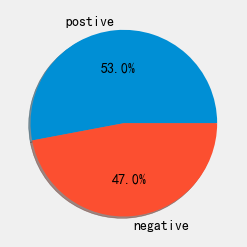

In [82]:
# 积极评论占比
import matplotlib.pyplot as plt 

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

pie_labels='postive','negative'
plt.pie([pos,neg],labels=pie_labels,autopct='%1.1f%%',shadow=True)

plt.show()


In [83]:
#获取消极评论数据
data2=data[data['emotion']<0.5]
data2.head(10)


,text,Release time,text_processed,text_len,emotion,key_words
1,卧槽吓死了真的是这个话题就不能说清楚吗以为有什么事了,03月29日 10:46,卧槽 吓死 真的 话题 说 事,7,0.199872,"[(卧槽, 3.475169413), (吓死, 2.376557124325), (话题,..."
2,国家企业信用信息公示系统显示浙江农夫山泉饮用水有限公司已注销网站信息显示该公司法定代表人为钟...,03月28日 23:43,国家 企业信用 信息 公示 系统 显示 浙江 饮用水 有限公司 注销 网站 信息 显示 公司...,28,0.004726,"[(注销, 0.9841391705622223), (年月日, 0.77531040351..."
7,农夫山泉老板钟睒睒身价为亿美元位居中国第一世界排名第,03月28日 16:57,老板 身价 亿美元 位居 第一 世界 排名第,8,0.487224,"[(排名第, 1.274849129937143), (身价, 1.209565092631..."
8,中国大富豪排名公布农夫山泉钟睒睒排名第一资产亿第二黄峥第三马化腾第四张一鸣,03月28日 16:16,富豪 排名 公布 排名 第一 资产 亿 黄峥 第三 马化腾 第四 张一鸣,13,0.035738,"[(排名, 1.1888485637672728), (黄峥, 1.086797045718..."
18,等等你不是日本株式会社吗同志们咱们要提防碟中谍反间计啊还是说小日本也疯特了,03月26日 08:56,株式会社 同志 提防 碟中谍 反间计 说 疯特,8,0.049195,"[(碟中谍, 1.9924612504833332), (疯特, 1.99246125048..."
20,给脓敷衫洗地的那些个大殖子过来解释解释翻译翻译你们的霓虹主子这是啥意思,03月25日 21:37,脓 敷衫 洗 大殖子 解释 解释 翻译 翻译 霓虹 主子 这是 啥意思,13,0.037462,"[(翻译, 1.498429772184), (敷衫, 1.19547675029), (大..."
26,江苏常州一家便利店发出公告称不在卖农夫山泉的任何产品了大哥你这操作把我整蒙了要知道是日本企业...,03月23日 08:57,江苏 常州 一家 便利店 发出 公告 称 卖 产品 大哥 操作 整蒙 企业 说 售卖 企业 ...,23,0.292851,"[(整蒙, 0.6291982896263157), (媚日, 0.629198289626..."
29,农夫山泉到底咋了日本人都看不下去了,03月23日 00:08,看不下去,2,0.428952,"[(看不下去, 10.7226238216)]"
30,人这公司最早是美国的在美国就叫正式商标表记方式为由于店铺的营业时间是从早上点开始到晚上点结束...,03月22日 17:13 转赞人数超过300,公司 最早 正式 商标 表记 方式 店铺 营业时间 是从 早上 点 晚上 点 结束 牵强附会...,17,0.034048,"[(神特, 0.8539119644928571), (营业时间, 0.8359609339..."
31,什么脑袋的中国人为日本公司下架中国产品叫好一群脑残,03月22日 11:27,脑袋 人为 日本公司 下架 产品 叫好 一群 脑残,9,0.270376,"[(日本公司, 1.4943459378625), (下架, 1.4943459378625..."


In [84]:
#获取积极评论数据
data3=data[data['emotion']>=0.5]
data3.head(10)


,text,Release time,text_processed,text_len,emotion,key_words
0,前几天用农夫山泉的虎年纪念瓶插了花据说这个瓶身设计是只送不卖的很有收藏价值感觉现在的年货越来...,03月20日 10:50,前 几天 虎年 纪念 瓶 插 花 瓶身 设计 送 卖 收藏 价值 感觉 年货 越来越 设计 ...,42,0.931577,"[(新春, 0.65026063065625), (瓶身, 0.36941362844687..."
4,近日胡润百富榜发布农夫山泉钟睒睒以亿第三次成为中国首富腾讯马化腾继年之后重回第二拼多多黄峥以...,03月28日 19:58,近日 胡润 百富榜 发布 亿 第三次 首富 腾讯 马化腾 继年 重回 拼 黄峥 亿 首次 位...,117,0.764672,"[(百富榜, 0.5266690911), (胡润, 0.486314519104), (企..."
5,月日胡润研究院发布的胡润百富榜显示岁的农夫山泉董事长钟睒睒以亿元连续第三次成为中国首富但较去...,03月28日 17:59,月 日 胡润 研究院 发布 胡润 百富榜 显示 岁 董事长 亿元 连续 第三次 首富 去年 ...,67,0.999994,"[(财富, 0.43169619284881355), (企业家, 0.3932115844..."
9,对于骨泥淀粉肠啥的我认为只要他们能改我就能吃而且平时也不总吃但是对于农夫山泉的事件与日本有关...,03月27日 22:32,骨泥 淀粉 肠 改 吃 平时 总 吃 事件 虚伪 丧 良心 企业家 沾边 包括 浙江 卫视 ...,27,0.981044,"[(卫视, 1.1052084495052632), (良心, 0.864244020805..."
10,是日本主要零售企业伊藤洋华堂所属便利店大水冲了龙王庙冷暖视频的微博视频,03月27日 17:00 转赞人数超过100,零售 企业 伊藤 洋华堂 所属 便利店 水冲 龙王庙 冷暖 微博,11,0.996316,"[(洋华堂, 1.32075304714), (微博, 1.19547675029), (便..."
11,可是不是日本企业吗越来越迷幻了,03月27日 14:23,企业 越来越 迷幻,4,0.610959,"[(迷幻, 3.901151024866667), (越来越, 1.878943173536..."
12,因为农夫山泉的日本元素而抵制的爱国者们估计知识有限不知道这个信息：是跨国连锁便利店集团成立于...,03月26日 20:18,元素 抵制 爱国者 估计 知识 有限 信息 跨国 连锁 便利店 集团 成立 年 最初 位于 ...,40,0.999945,"[(子公司, 0.3920080721005714), (洋华堂, 0.3773580134..."
13,本身就是日本企业啊太魔幻了,03月26日 18:00 转赞人数超过1万,企业 太 魔幻,4,0.975381,"[(魔幻, 5.56404446485), (企业, 2.110886092475)]"
15,你就是日本的品牌吧日本占你的最大股份你装什么啊好搞笑今日笑料,03月26日 16:10 转赞人数超过1万,品牌 占 股份 装 搞笑 今日 笑料,8,0.910612,"[(搞笑, 2.1066763644), (笑料, 2.1066763644), (品牌, ..."
16,啊没记错也是日本的品牌吧这个世界好魔幻,03月26日 14:54,没 记错 品牌 世界 魔幻,6,0.999004,"[(魔幻, 2.782022232425), (记错, 2.6087354373), (品牌..."


In [85]:
text2=data2['text_processed']
text3=data3['text_processed']

In [86]:
#积极消极关键词top10
import jieba.analyse

# 假设 text2 是一个 Series 对象，包含多条文本
# 首先从 Series 中提取文本内容，然后合并成一个字符串
text_combined = ' '.join(text2)

# 调用 extract_tags() 函数
key_words = jieba.analyse.extract_tags(sentence=text_combined, topK=10, withWeight=True, allowPOS=())
key_words



[('农夫', 0.12609684518321257),
 ('矿泉水', 0.089956718363458),
 ('好喝', 0.04745029424163542),
 ('一瓶', 0.04535148498639724),
 ('自来水', 0.03590897760768093),
 ('真的', 0.035450588876332456),
 ('饮料', 0.030089230916809633),
 ('瓶子', 0.02754129027619454),
 ('味道', 0.02750617433883226),
 ('康师傅', 0.026617607339398427)]

In [87]:
#积极积极关键词top10
import jieba.analyse

# 假设 text3 是一个 Series 对象，包含多条文本
# 首先从 Series 中提取文本内容，然后合并成一个字符串
text_combined = ' '.join(text3)

# 调用 extract_tags() 函数
key_words = jieba.analyse.extract_tags(sentence=text_combined, topK=10, withWeight=True, allowPOS=())
key_words


[('怡宝', 0.04572612624767945),
 ('首富', 0.04348387523101617),
 ('爱国', 0.042062377793084),
 ('收起', 0.03485358813732842),
 ('矿泉水', 0.03201193858037505),
 ('好喝', 0.03177164681176887),
 ('喜欢', 0.029639894866468782),
 ('农夫', 0.029184601446400563),
 ('真的', 0.027473229853888493),
 ('企业', 0.026284660193122106)]

In [88]:
from itertools import chain

In [89]:
vocab = set(chain(*map(lambda x: jieba.lcut(str(x)), data['text_processed'])))
print("训练集共包含不同词汇总数为：", len(vocab))


训练集共包含不同词汇总数为： 48438


In [90]:
# 使用jieba中的词性标注功能
import jieba.posseg as pseg

def get_a_list(text):
    """用于获取形容词列表"""
    # 使用jieba的词性标注方法切分文本,获得具有词性属性flag和词汇属性word的对象, 
    # 从而判断flag是否为形容词,来返回对应的词汇
    r = []
    for g in pseg.lcut(text):
        if g.flag == "a":
            r.append(g.word)
    return r


In [91]:
# 导入绘制词云的工具包
from wordcloud import WordCloud
def get_word_cloud(keywords_list):
    # 实例化绘制词云的类, 其中参数font_path是字体路径, 为了能够显示中文, 
    # max_words指词云图像最多显示多少个词, background_color为背景颜色 
    wordcloud = WordCloud(font_path='C:/WINDOWS/Fonts/simhei.ttf', max_words=100, background_color="white")  #font_path="F:/data/SimHei.ttf",
    # 将传入的列表转化成词云生成器需要的字符串形式
    keywords_string = " ".join(keywords_list)
    # 生成词云
    wordcloud.generate(keywords_string)

    # 绘制图像并显示
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


In [92]:
from itertools import chain

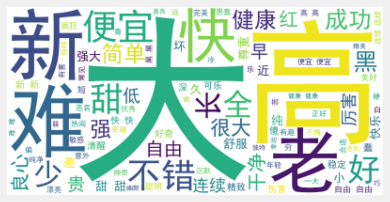

In [93]:
###积极评论词云图
p_data = data3['text_processed']

# 对正样本的每个句子的形容词
p_a_vocab = chain(*map(lambda x: get_a_list(x), p_data))
#print(train_p_n_vocab)


# 调用绘制词云函数
get_word_cloud(p_a_vocab)
